# Проектная работа "Аналитика в авиакомпании"

Заказчик — российская авиакомпания «F9», выполняющая внутренние пассажирские авиаперевозки.

Цель проекта - изучив базу данных и проанализировав спрос пассажиров на рейсы в различные города России, выяснить предпочтения пользователей, покупающих билеты на те или иные направления.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Парсинг-данных" data-toc-modified-id="Парсинг-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Парсинг данных</a></span></li><li><span><a href="#Изучение-общей-информации-и-проверка-типов-данных" data-toc-modified-id="Изучение-общей-информации-и-проверка-типов-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение общей информации и проверка типов данных</a></span></li><li><span><a href="#Исследовательский-анализ-и-визуализация-данных" data-toc-modified-id="Исследовательский-анализ-и-визуализация-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ и визуализация данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Парсинг данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

In [3]:
table_head = []
for row in soup.find_all('th'):
    table_head.append(row.text)

table_content = []
for row in soup.find_all('tr'): 
    if not row.find_all('th'): 
            table_content.append([element.text for element in row.find_all('td')])

festivals = pd.DataFrame(table_content, columns = table_head)

In [4]:
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


## Изучение общей информации и проверка типов данных

In [5]:
planes_on_flights = pd.read_csv('/datasets/query_1.csv')
planes_on_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
planes_on_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


В данной таблице содержится информация о 8-ми моделях самолетов и о количестве рейсов для каждой из них, совершенных в сентябре 2018 года. Типы данных соответствуют содержащейся в таблице информации.

In [7]:
flights_in_city = pd.read_csv('/datasets/query_3.csv')
flights_in_city

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
flights_in_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В таблице содержится информация о городах в России и среднем количестве рейсов, прибывающих в них за день в августе 2018 года.  Типы данных соответствуют содержащейся в таблице информации.

## Исследовательский анализ и визуализация данных

In [9]:
top_10_city = flights_in_city.sort_values(by='average_flights', ascending=False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Выделяем в отдельную таблицу 10 городов с самым большим количеством принятых рейсов.

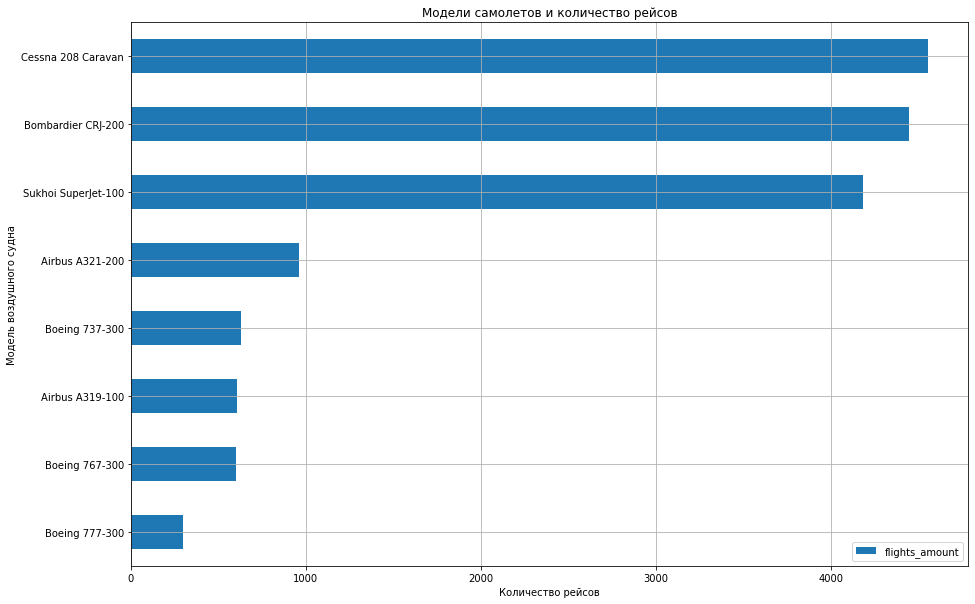

In [10]:
planes_on_flights.sort_values(
    by='flights_amount', ascending=True).plot.barh(
    x='model', y='flights_amount', grid = True, figsize = (15, 10))
plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Модель воздушного судна');

Так как мы рассматриваем данные о внутренних авиаперевозках (пусть и в самой большой стране мира), абсолютным преимуществом пользуются ближнемагистральные, узкофюзеляжные модели самолетов, дальность полетов которых составляет от 1000 до 3000 км с пассажировместимостью до 100 человек:
1. Cessna 208 Caravan
2. Bombardier CRJ-200
3. Sukhoi SuperJet-100

Логично было бы предположить, что, затрачивая меньшее время на перелет, посадку и проверку пассажиров, погрузку и разгрузку багажа, перечисленные модели самолетов могут совершать большее количество рейсов, чем средне- и дальнемагистральные более пассажировместимые самолеты, что подтверждается показателями графика.

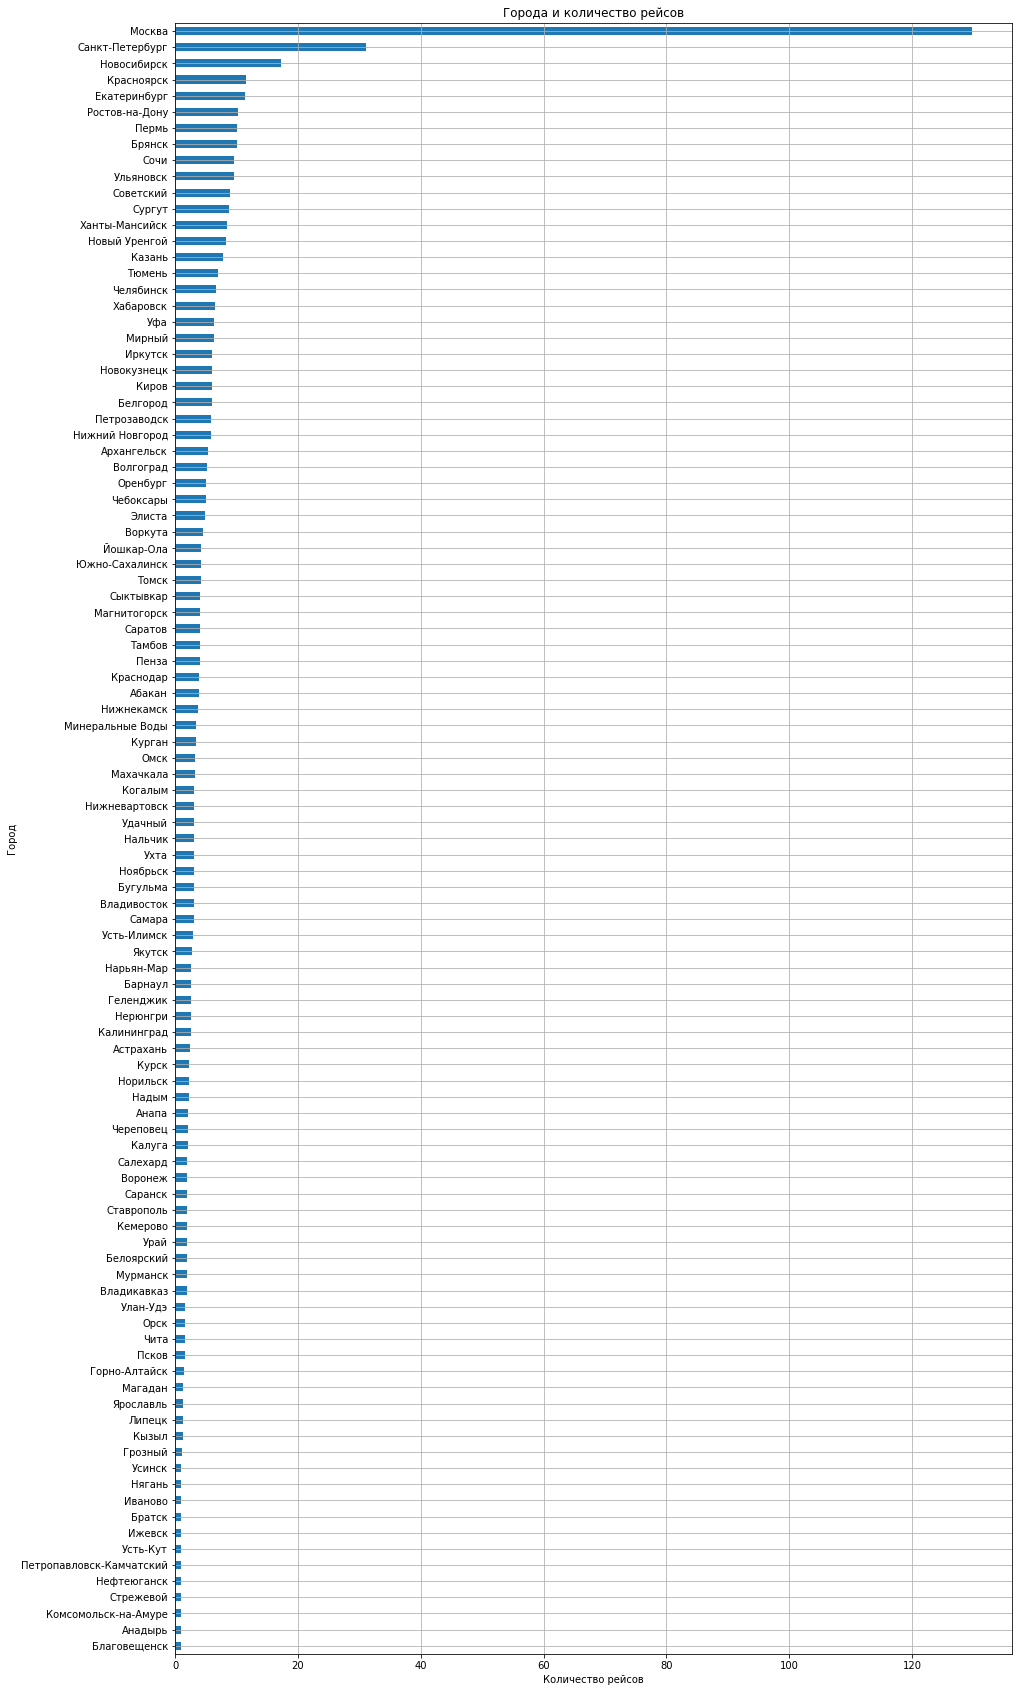

In [11]:
flights_in_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (15, 30), legend=False)
plt.title('Города и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

Как и можно было предположить, на Москву - абсолютного лидера по количеству рейсов, приходится почти четверть всех рейсов из представленной таблицы (23.4%). Большой ряд факторов влияет на количество рейсов в том или ином городе. Так как мы имеем очень небольшое количество информации, то о причинах распределения городов на графике можно только предполагать исходя из логики, личных знаний и опыта. Можно предположить, что главными факторами влияющими на количество рейсов являются:

1. Количество и качественные характеристики аэропортов
2. Количество внешних рейсов
3. Населенность города и развитость его инфраструктуры

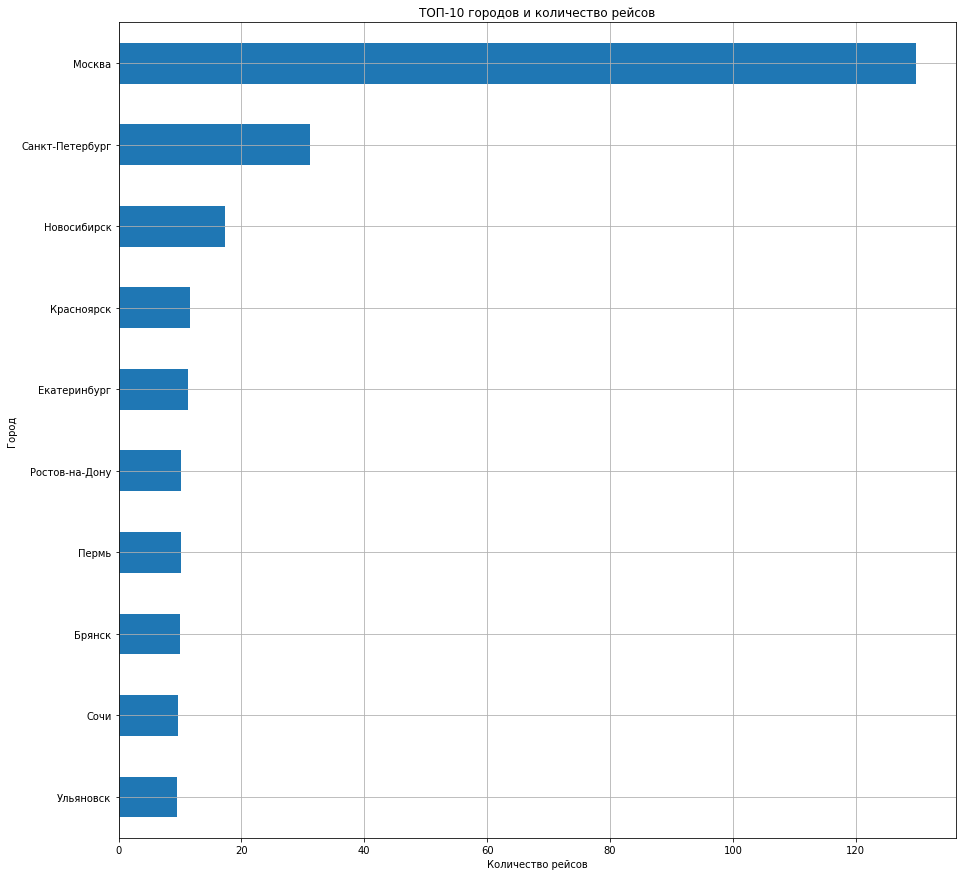

In [12]:
top_10_city.sort_values(
    by='average_flights', ascending=True).plot.barh(
    x='city', y='average_flights', grid = True, figsize = (15, 15), legend=False)
plt.title('ТОП-10 городов и количество рейсов')
plt.xlabel('Количество рейсов')
plt.ylabel('Город');

Рассматривая более детально 10ку лидеров по количеству рейсов можно обратить внимание, что 7 городов из них являются городами - "миллионниками". Исключением здесь являются лишь Брянск, Сочи и Ульяновск. Без дополнительных данных можно только предположить, что рейсы в Брянск пользуются спросом из-за его близкого расположения к границам двух соседних государств. Так как мы брали данные за август 2018 года, попадание Сочи в выборку вполне объяснимо - курортный сезон там с легкостью продлится до конца сентября. Рейсы в Ульяновск возможно оправдываются наличием в области большого количества промышленных предприятий.

## Общий вывод

В данном проекте у нас в наличии имелся очень скромный набор информации. Для более объемного анализа нам очень пригодились бы данные имеющиеся в свободном доступе в сети, такие как технические характеристики представленных моделей самолетов, характеристики аэропортов, а также данные о населении и инфраструктурах рассматриваемых городов.
Однако из имеющихся данных можно сделать следующие выводы:

1. Проведение фестивалей в городах практически не корррелирует с количеством рейсов (чего нельзя сказать о сезонности)
2. Лидерами по количеству рейсов являются небольшие модели самолетов, преодолевающие дистанции до 3000 км(что не говорит об их прибыльности перед более пассажировместимыми судами)
3. Города, лидирующие по количеству рейсов, в основном густонаселены, имеют не один аэропорт и инфраструктурно развиты.

